# ЛР 1 (В8)
## Основные понятия математической статистики. Вариационный ряд. Эмпирическая функция распределения.

In [1]:
from random import uniform
from tabulate import tabulate
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# 1

In [2]:
def Y(x):
    return 2 / (2 + x)

a = -1
b = 5
y0 = 1
n = 100

In [3]:
X = sorted(round(uniform(0, 1) * (b - a) + a, 3) for _ in range(n))
X

[-0.997,
 -0.942,
 -0.842,
 -0.815,
 -0.682,
 -0.555,
 -0.507,
 -0.41,
 -0.396,
 -0.309,
 -0.169,
 -0.122,
 -0.061,
 -0.041,
 -0.006,
 0.041,
 0.086,
 0.104,
 0.199,
 0.206,
 0.231,
 0.31,
 0.312,
 0.346,
 0.401,
 0.469,
 0.51,
 0.55,
 0.628,
 0.64,
 0.661,
 0.732,
 0.787,
 0.811,
 0.832,
 0.914,
 0.943,
 0.977,
 0.988,
 1.16,
 1.261,
 1.286,
 1.341,
 1.363,
 1.477,
 1.57,
 1.709,
 1.756,
 1.841,
 1.94,
 1.999,
 2.031,
 2.099,
 2.132,
 2.174,
 2.25,
 2.285,
 2.32,
 2.469,
 2.47,
 2.673,
 2.715,
 2.795,
 2.809,
 2.98,
 2.984,
 3.043,
 3.105,
 3.17,
 3.228,
 3.252,
 3.271,
 3.303,
 3.429,
 3.47,
 3.643,
 3.694,
 3.741,
 3.758,
 3.872,
 3.933,
 3.996,
 4.012,
 4.084,
 4.094,
 4.124,
 4.156,
 4.322,
 4.335,
 4.58,
 4.6,
 4.633,
 4.66,
 4.664,
 4.791,
 4.844,
 4.858,
 4.927,
 4.93,
 4.96]

In [4]:
y_list = sorted([round(Y(X[i]), 3) for i in range(n)])

# 2

Вариационный ряд

In [5]:
y_list

[0.287,
 0.289,
 0.289,
 0.292,
 0.292,
 0.295,
 0.3,
 0.3,
 0.302,
 0.303,
 0.304,
 0.316,
 0.316,
 0.325,
 0.327,
 0.328,
 0.329,
 0.333,
 0.334,
 0.337,
 0.341,
 0.347,
 0.348,
 0.351,
 0.354,
 0.366,
 0.368,
 0.377,
 0.379,
 0.381,
 0.383,
 0.387,
 0.392,
 0.397,
 0.401,
 0.402,
 0.416,
 0.417,
 0.424,
 0.428,
 0.447,
 0.448,
 0.463,
 0.467,
 0.471,
 0.479,
 0.484,
 0.488,
 0.496,
 0.5,
 0.508,
 0.521,
 0.532,
 0.539,
 0.56,
 0.575,
 0.595,
 0.599,
 0.609,
 0.613,
 0.633,
 0.669,
 0.672,
 0.68,
 0.686,
 0.706,
 0.711,
 0.718,
 0.732,
 0.752,
 0.758,
 0.761,
 0.784,
 0.797,
 0.81,
 0.833,
 0.853,
 0.865,
 0.866,
 0.896,
 0.907,
 0.91,
 0.951,
 0.959,
 0.98,
 1.003,
 1.021,
 1.031,
 1.065,
 1.092,
 1.183,
 1.247,
 1.258,
 1.34,
 1.384,
 1.517,
 1.688,
 1.727,
 1.89,
 1.994]

Эмпирическая функция распределения

In [6]:
counts = dict(Counter(y_list))
freq = [round(i / n, 3) for i in counts.values()]
ys = [0]
for k, i in enumerate(counts.values()):
    ys.append(ys[k] + i)
star_f = [round(i / n, 3) for i in ys]
star_f

[0.0,
 0.01,
 0.03,
 0.05,
 0.06,
 0.08,
 0.09,
 0.1,
 0.11,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0]

Таблица и график

In [7]:
x_list = sorted(list(set(y_list[:])))

table = [list(item) for item in zip(x_list, counts.values(), freq, ys[1:], star_f[1:])]
print(tabulate(table, headers=['Значение', 'Количество вариант', 'Частота',
                               'Накопленное количество вариант', 'Накопленная частота'], tablefmt='fancy_grid'))

╒════════════╤══════════════════════╤═══════════╤══════════════════════════════════╤═══════════════════════╕
│   Значение │   Количество вариант │   Частота │   Накопленное количество вариант │   Накопленная частота │
╞════════════╪══════════════════════╪═══════════╪══════════════════════════════════╪═══════════════════════╡
│      0.287 │                    1 │      0.01 │                                1 │                  0.01 │
├────────────┼──────────────────────┼───────────┼──────────────────────────────────┼───────────────────────┤
│      0.289 │                    2 │      0.02 │                                3 │                  0.03 │
├────────────┼──────────────────────┼───────────┼──────────────────────────────────┼───────────────────────┤
│      0.292 │                    2 │      0.02 │                                5 │                  0.05 │
├────────────┼──────────────────────┼───────────┼──────────────────────────────────┼───────────────────────┤
│      0.295 │     

In [8]:
x_list.insert(0, -float('inf'))
x_list.append(float('inf'))
x_interval = [(x_list[i], x_list[i+1]) for i in range(len(x_list) - 1)]
table = [list(item) for item in zip(x_interval, star_f)]
print(tabulate(table, headers=['Промежуток', 'Значение функции'], tablefmt='fancy_grid'))

╒════════════════╤════════════════════╕
│ Промежуток     │   Значение функции │
╞════════════════╪════════════════════╡
│ (-inf, 0.287)  │               0    │
├────────────────┼────────────────────┤
│ (0.287, 0.289) │               0.01 │
├────────────────┼────────────────────┤
│ (0.289, 0.292) │               0.03 │
├────────────────┼────────────────────┤
│ (0.292, 0.295) │               0.05 │
├────────────────┼────────────────────┤
│ (0.295, 0.3)   │               0.06 │
├────────────────┼────────────────────┤
│ (0.3, 0.302)   │               0.08 │
├────────────────┼────────────────────┤
│ (0.302, 0.303) │               0.09 │
├────────────────┼────────────────────┤
│ (0.303, 0.304) │               0.1  │
├────────────────┼────────────────────┤
│ (0.304, 0.316) │               0.11 │
├────────────────┼────────────────────┤
│ (0.316, 0.325) │               0.13 │
├────────────────┼────────────────────┤
│ (0.325, 0.327) │               0.14 │
├────────────────┼────────────────────┤


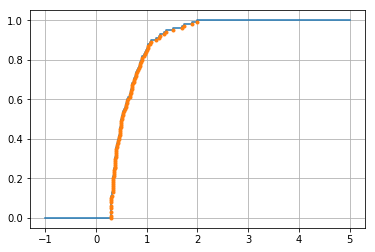

In [9]:
x_plot = x_list[1:-1]
y_plot = star_f[:]
x_plot.insert(0, a)
x_plot.append(b)
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.grid(True)
plt.show()

# 3

Теоритическая функция распределения

In [10]:
def G(y):
    if y < 2 / 7:
        return 0
    elif y > 2:
        return 1
    else:
        return 1 / 3 * (-(1 / y) + 3.5)

График теоритической функции расределения

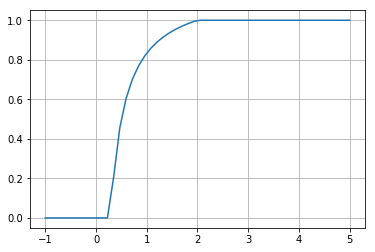

In [11]:
x_lin = np.linspace(min(x_plot), max(x_plot), 50)
plt.plot(x_lin, list(map(G, x_lin)))
plt.grid(True)
plt.show()

График эмпирической и теоретической функции

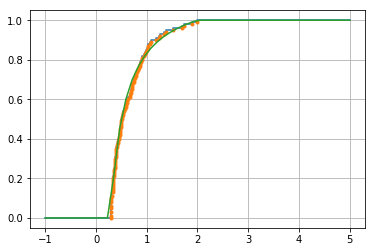

In [12]:
plt.step(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.plot(x_lin, list(map(G, x_lin)))
plt.grid(True)
plt.show()